<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/333_Intro_to_YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/JQ_RRcHLKFc

# **An introduction to YOLO v8 <p>**

This notebook walks you through a few lines of code to help explore YOLO v8 for object detection and instance segmentation using pre-trained weights. More information about YOLO v8 can be found here.

https://docs.ultralytics.com/models/yolov8/#key-features


In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

Load the model. Here, we will load both detection and instance models to see the difference in the type of results from these models.

In [ ]:
#Detection model
det_model = YOLO('yolov8n.pt')

#Instance model
inst_model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 18.5MB/s]
100%|██████████| 6.73M/6.73M [00:00<00:00, 15.8MB/s]


Run inference on an input image using both models.

In [ ]:
# Perform object detection on an image using the model
img = '/content/drive/MyDrive/ColabNotebooks/data/kitchen.JPG'
detection_results = det_model.predict(img)
instance_results = inst_model.predict(img)



image 1/1 /content/drive/MyDrive/ColabNotebooks/data/kitchen.JPG: 448x640 2 bottles, 1 cup, 1 knife, 3 bowls, 1 chair, 2 potted plants, 2 dining tables, 2 ovens, 1 refrigerator, 66.6ms
Speed: 13.9ms preprocess, 66.6ms inference, 39.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/ColabNotebooks/data/kitchen.JPG: 448x640 2 bottles, 2 cups, 1 bowl, 1 potted plant, 1 dining table, 3 ovens, 2 sinks, 1 refrigerator, 1 vase, 23.9ms
Speed: 2.0ms preprocess, 23.9ms inference, 5.9ms postprocess per image at shape (1, 3, 448, 640)


Plot the results and compare. Notice how the object detection model gives bounding boxes only whereas the instance segmentation results give both the bounding box and corresponding object pixels.

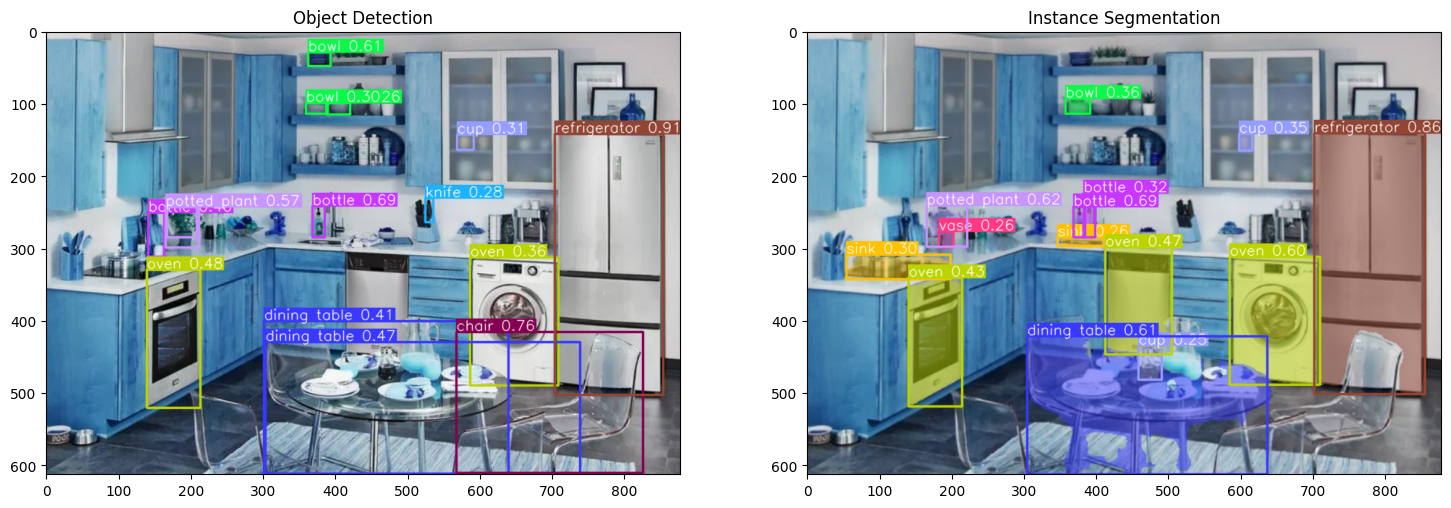

In [ ]:
detection_result_array = detection_results[0].plot()
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Object Detection")
ax1.imshow(detection_result_array)
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Instance Segmentation")
ax2.imshow(instance_result_array)

You can explore the results manually. For example, how many instance results do we have, what is the label and bounding box coordinates for a specific detected object.

In [ ]:
#Number of bounding boxes (objects) detected in the image
result = instance_results[0]
len(result.boxes)

14

In [ ]:
#BBOX coordinates, class ID, and probability for a specific box.
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 72.0
Coordinates: [701.0631103515625, 141.81573486328125, 854.4906616210938, 502.5235595703125]
Probability: 0.8582196831703186
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 